## Demo of running AMRClaw Fortran code and plotting results

This notebook can be found in `$CLAW/apps/notebooks/amrclaw_advection_2d_square`

The is adapted from $CLAW/amrclaw/examples/advection_2d_square to illustrate the use of IPython notebooks.

The setrun.py and setplot.py files are taken from that example but some parameters are modified in the notebook below.

The 2-dimensional advection equation $q_t + uq_x + vq_y = 0$ is solved in the unit square with periodic boundary conditions.  The constant advection velocities $u$ and $v$ are specified in setrun.py but can be changed below.

Have plots appear inline in notebook:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Check that the CLAW environment variable is set.  (It must be set in the Unix shell before starting the notebook server).

In [2]:
import os
try:
    CLAW = os.environ['CLAW'] 
    print "Using Clawpack from ", CLAW
except:
    print "*** Environment variable CLAW must be set to run code"

Using Clawpack from  /Users/rjl/git/clawpack


### Module with functions used to execute system commands and capture output:

In [3]:
from clawpack.clawutil import nbtools

### Compile the code:

In [6]:
nbtools.make_exe(new=True)  # new=True ==> force recompilation of all code

Executing shell command:   make new
Done...  Check this file to see output:


/Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/compile_output.txt

### Make documentation files:

In [7]:
nbtools.make_htmls()

See the README.html file for links to input files...


/Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/README.html

### Run the code and plot results using the setrun.py and setplot.py files in this directory:

First create data files needed for the Fortran code, using parameters specified in setrun.py:

In [8]:
nbtools.make_data(verbose=False)

Now run the code and produce plots.  Specifying a label insures the resulting plot directory will persist after later runs are done below.

In [9]:
outdir,plotdir = nbtools.make_output_and_plots(label='1')

Executing shell command:   make output OUTDIR=_output_1
Done...  Check this file to see output:


/Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/run_output_1.txt

Executing shell command:   make plots OUTDIR=_output_1 PLOTDIR=_plots_1
Done...  Check this file to see output:


/Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/plot_output_1.txt

View plots created at this link:


/Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/_plots_1/_PlotIndex.html

### Display the animation inline:

Clicking on the _PlotIndex link above, you can view an animation of the results.  

After creating all png files in the _plots directory, these can also be combined in an animation that is displayed inline:

In [10]:
import clawpack.visclaw.JSAnimation.JSAnimation_frametools as J
anim = J.make_anim(plotdir, figno=0, figsize=(6,4))
anim

### Illustrate how to adjust some parameters and rerun the code: 

First read in the current rundata.  (See the <a href="README.html">README.html</a> file for a link to `setrun.py`).

In [11]:
import setrun
rundata = setrun.setrun()

Here we adjust the mesh to be $40 \times 40$ and set two gauges at $(0.6, 0.4)$ and $(0.6,0.8)$.

In [12]:
rundata.clawdata.num_cells = [40,40]
rundata.gaugedata.gauges = [[1, 0.6, 0.4, 0., 10.], [2, 0.6, 0.8, 0., 10.]]

The advection velocities can also be changed (in setrun.py, $(u,v) = (0.5,1)$.

In [13]:
rundata.probdata.u = -1.0
rundata.probdata.v = 1.0

Change the limiter if you want to experiment with other methods.  A list of 1 limiter is required since this is a scalar problem with only 1 wave in the Riemann solution.

Here we set the limiter to ['none'] to see the oscillations that arise if Lax-Wendroff is used with no limiter.

In [14]:
rundata.clawdata.limiter = ['none']

### Write the data out (for the Fortran code to read in) and run the code:

In [15]:
rundata.write()
outdir, plotdir = nbtools.make_output_and_plots(label='2')

Executing shell command:   make output OUTDIR=_output_2
Done...  Check this file to see output:


/Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/run_output_2.txt

Executing shell command:   make plots OUTDIR=_output_2 PLOTDIR=_plots_2
Done...  Check this file to see output:


/Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/plot_output_2.txt

View plots created at this link:


/Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/_plots_2/_PlotIndex.html

## Changing plot parameters and plotting inline

In addition to producing a _plots directory using the parameters in setplot.py, plot parameters can be changed and plots produced inline as the examples below illustrate...

In [16]:
import setplot
plotdata = setplot.setplot()
plotdata.outdir = outdir

### Plot one frame of the solution:

    Reading  Frame 2 at t = 0.4  from outdir = /Users/rjl/git/clawpack/apps/notebooks/amrclaw/advection_2d_square/_output_2


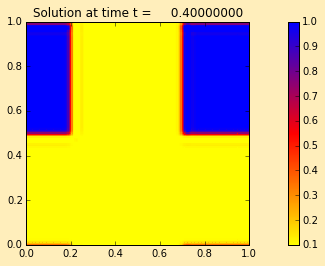

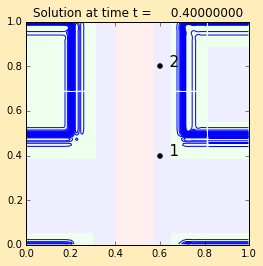

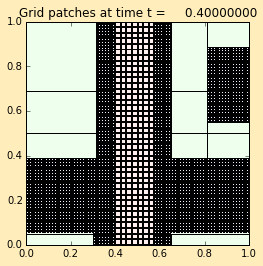

In [17]:
plotdata.plotframe(2)

### Adjust some plot parameters:

In [18]:
plotdata.showitems()   # shows the currently defined figures, axes, items



Current plot figures, axes, and items:
---------------------------------------
  figname = pcolor, figno = 0
     axesname = AXES1, axescmd = subplot(1,1,1)
        itemname = ITEM1,  plot_type = 2d_pcolor
 
  figname = contour, figno = 1
     axesname = AXES1, axescmd = subplot(1,1,1)
        itemname = ITEM1,  plot_type = 2d_contour
 
  figname = cells, figno = 2
     axesname = AXES1, axescmd = subplot(1,1,1)
        itemname = ITEM1,  plot_type = 2d_patch
 
  figname = q, figno = 300
     axesname = AXES1, axescmd = subplot(1,1,1)
        itemname = ITEM1,  plot_type = 1d_plot
 


Change the color limits for the pcolor plot to show the overshoots and undershoots with Lax-Wendroff.  Also suppress showing the other plots...

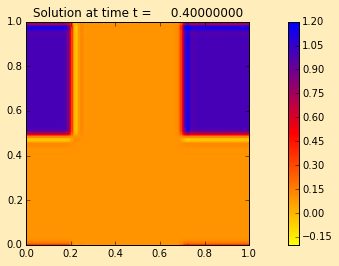

In [19]:
plotitem = plotdata.getitem('ITEM1','AXES1','pcolor')
plotitem.pcolor_cmin = -0.2
plotitem.pcolor_cmax = 1.2
plotdata.getfigure('contour').show = False
plotdata.getfigure('cells').show = False
plotdata.plotframe(2)

### Explore the gauge output:

The overshoots and undershoots with Lax-Wendroff are even more visible in the gauge output...

Gauge 1 at [0.6, 0.4] has a maximum value of q = 1.16098 at t = 1.84500
Gauge 2 at [0.6, 0.8] has a maximum value of q = 1.15636 at t = 1.54062


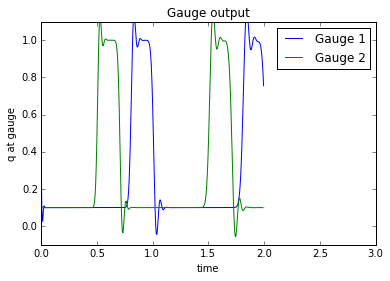

In [21]:
for gaugeno in [1,2]:
    gauge = plotdata.getgauge(gaugeno)
    q = gauge.q[0,:]
    t = gauge.t
    qmax = q.max()
    tmax = t[q.argmax()]
    print "Gauge %s at %s has a maximum value of q = %7.5f at t = %7.5f" \
        % (gaugeno, gauge.location, qmax, tmax)
    plot(t,q,label="Gauge %s" % gaugeno)
legend()
xlim(0,3)
ylim(-0.1,1.1)
xlabel('time')
ylabel('q at gauge')
title("Gauge output")